In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/retail_sales_dataset.csv")

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
#tarih verilerini datetime64'e çevirme
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df["Date"].dt.month

0      11
1       2
2       1
3       5
4       5
       ..
995     5
996    11
997    10
998    12
999     4
Name: Date, Length: 1000, dtype: int32

In [7]:
df['Gender'] = df['Gender'].astype('category')

In [8]:
df['Product Category'] = df['Product Category'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   category      
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   category      
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(5), object(1)
memory usage: 57.0+ KB


In [10]:
df["Month"] = df["Date"].dt.to_period("M").astype(str)

In [11]:
monthly_sales = df.groupby("Month")["Total Amount"].sum().reset_index()

/var/folders/nt/zv6d46815b59c7j2j2ry2sk00000gn/T/ipykernel_8103/4019698225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month", y="Total Amount", data=monthly_sales, palette="Blues_d")


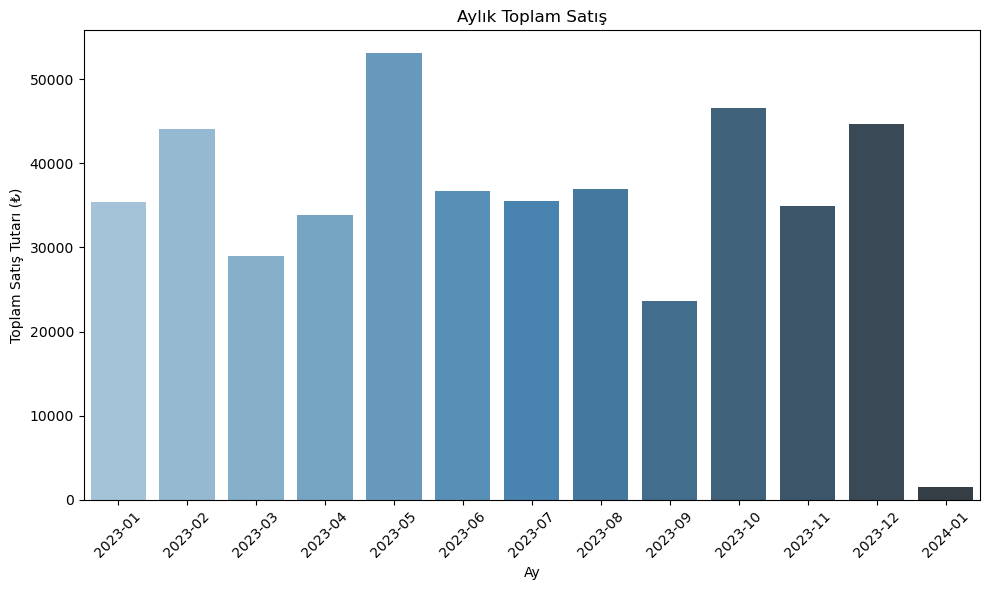

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Month", y="Total Amount", data=monthly_sales, palette="Blues_d")
plt.title("Aylık Toplam Satış")
plt.xlabel("Ay")
plt.ylabel("Toplam Satış Tutarı (₺)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/nt/zv6d46815b59c7j2j2ry2sk00000gn/T/ipykernel_8103/2457437342.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_sales = df.groupby("Gender")["Total Amount"].sum().reset_index()
/var/folders/nt/zv6d46815b59c7j2j2ry2sk00000gn/T/ipykernel_8103/2457437342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Total Amount", data=gender_sales, palette="pastel")


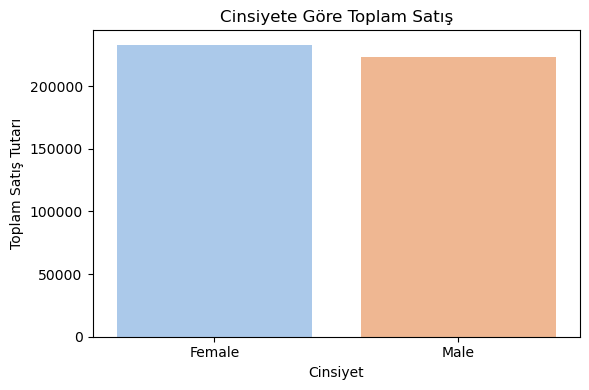

In [27]:
gender_sales = df.groupby("Gender")["Total Amount"].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x="Gender", y="Total Amount", data=gender_sales, palette="pastel")
plt.title("Cinsiyete Göre Toplam Satış")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Satış Tutarı")
plt.tight_layout()
plt.show()

/var/folders/nt/zv6d46815b59c7j2j2ry2sk00000gn/T/ipykernel_8103/4069537491.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales = df.groupby("Product Category")["Total Amount"].sum().reset_index().sort_values(by="Total Amount", ascending=False)
/var/folders/nt/zv6d46815b59c7j2j2ry2sk00000gn/T/ipykernel_8103/4069537491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Amount", y="Product Category", data=category_sales, palette="Set2")


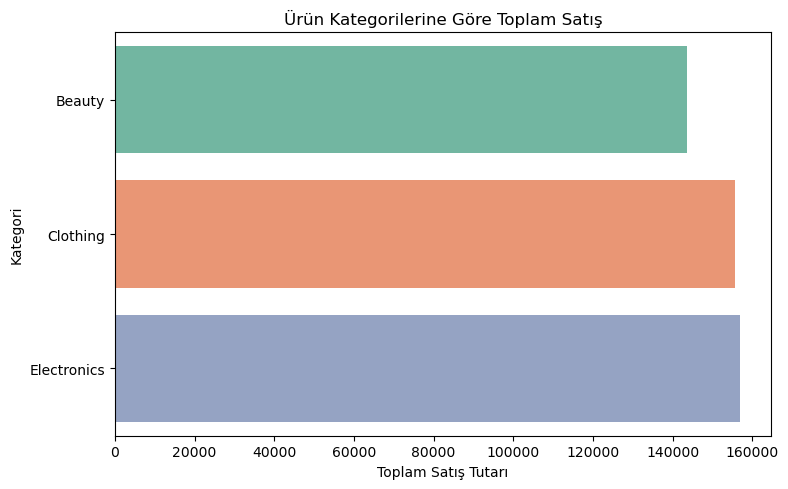

In [33]:
category_sales = df.groupby("Product Category")["Total Amount"].sum().reset_index().sort_values(by="Total Amount", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Total Amount", y="Product Category", data=category_sales, palette="Set2")
plt.title("Ürün Kategorilerine Göre Toplam Satış")
plt.xlabel("Toplam Satış Tutarı")
plt.ylabel("Kategori")
plt.tight_layout()
plt.show()

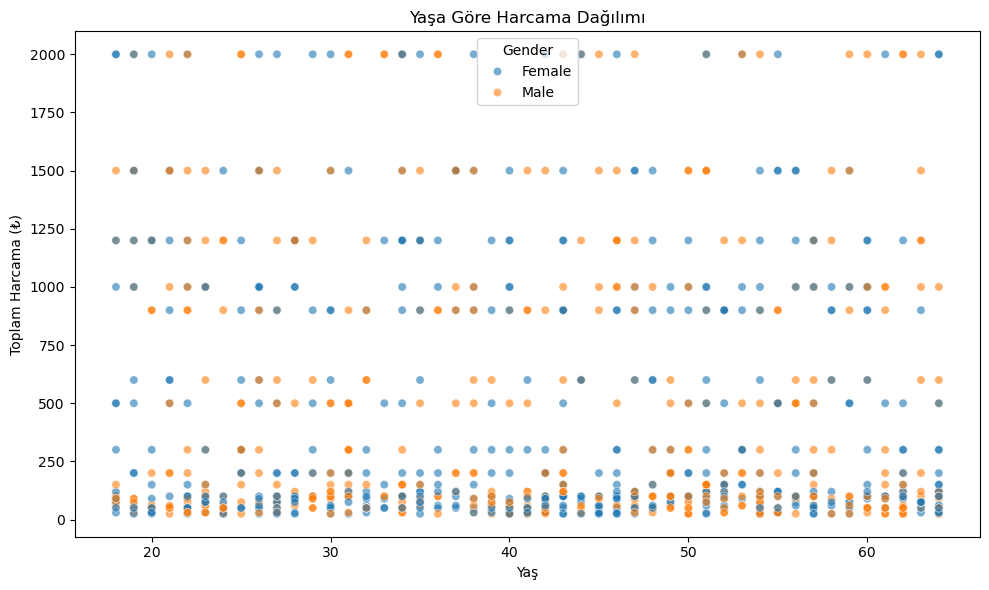

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Total Amount", data=df, hue="Gender", alpha=0.6)
plt.title("Yaşa Göre Harcama Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Toplam Harcama (₺)")
plt.tight_layout()
plt.show()